# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
# !pip install -q gdown
# !gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
# !gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps
import warnings

warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство, которое периодически излучает лучи на поверхность Земли (считайте, что поверхность Земли представляет из себя прямую). Пусть $l$ — перпендикуляр к поверхности Земли, опущенный из точки, в которой закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы осуществляются независимо). В этих предположениях точки пересечения с поверхностью имеют распределение Коши с плотностью $p(x) = \frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$ соответствует проекции точки расположения устройства на поверхность Земли (направление оси и начало координат на поверхности Земли выбраны заранее некоторым образом независимо от расположения устройства). В файле Cauchy.csv находятся координаты точек пересечения лучей с поверхностью Земли.

In [3]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор точек с некоторым шагом и верните ту, на которой достигается максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01  Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Плотность задаётся формулой
$$ p(x) = \frac{1}{\pi(1+(x - x_0)^2)} $$
Функция правдоподобия по выборке размера N имеет вид:
$$ f = \frac{1}{\pi^N} \prod_{i=1}^N \frac{1}{(1+(x_i - x_0)^2)} $$

Логарифмируем и дифференцируем её:
$$L(x, x_0) = -N\log(\pi) - \log\prod_{i=1}^N (1+(x_i - x_0)^2)$$

__Вся выборка__

In [4]:
def log_likehood(sample, loc_):
    return np.sum(sps.cauchy.logpdf(sample, loc=loc_, scale=1))


def find_estimate(sample, range_):
    res = np.array([log_likehood(sample, loc_) for loc_ in range_])
    return range_[res.argmax()]


x = np.arange(-1000, 1000, 0.01)
print(find_estimate(sample_1, x))

207.97999999890135


__Первые 10 измерений__

In [5]:
print(find_estimate(sample_1[:10], x))

208.52999999890085


__Первые 100 измерений__

In [6]:
print(find_estimate(sample_1[:100], x))

207.89999999890142


Сравните полученные результаты с `sps.cauchy.fit`

In [7]:
print(sps.cauchy.fit(sample_1))

(207.97772827944334, 0.9451391657739334)


#### Вывод

В результате моделирования были получены следующие параметры сдвига:
1. $x_0_{\textit{all}} = 207.9799$
2. $x_0_{10} = 208.5290$
3. $x_0_{100} = 207.8999$
4. $x_0_{\textit{true}} = 207.9777$

Отметим, что с числом значений мы приближаемся к "истинному значению". Результаты разных итераций различаются не так сильно, как можно было предположить: поскольку все значения выборки получены единовременно, все её значения подчиняются распределению Коши с одним и тем же параметром сдвига (далее играют роль систематические и приборные погрешности).

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по сравнению с началом дня (6 часов утра). В полночь работники банка измеряют две величины: $X^1$ – максимальное значение баланса за день, $X^2$ – значение баланса в полночь. Считается, что величина $X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ – параметр формы. В течение 10 лет каждый день банк проводил измерение величины $X,$ получив в результате выборку $X_1, \ldots, X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [8]:
sample_2 = np.loadtxt("Weibull.csv")
# убираем нулевые значения, чтобы избежать деления на 0
m = np.min(sample_2[sample_2 != 0])
sample_2[sample_2 == 0] = m / 100

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

# константы
alpha_ = 0.05
days_ = 1461
# ECDF
x1 = sample_2[days_:]
x2 = sample_2[:days_]
emp_cdf_4 = ECDF(x1)(x1)
emp_cdf = ECDF(x2)(x2)

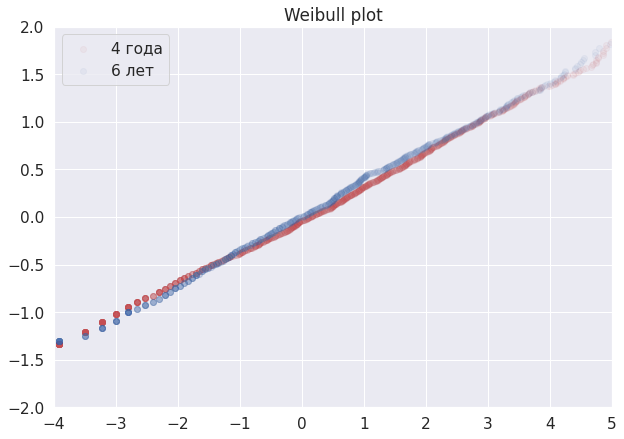

In [10]:
# построение графика
plt.figure(figsize=(10, 7))
plt.scatter(x=np.log(x1), y=np.log(-np.log(1 - emp_cdf_4)), alpha=alpha_, color='r', label='4 года')
plt.scatter(x=np.log(x2), y=np.log(-np.log(1 - emp_cdf)), alpha=alpha_, color='b', label='6 лет')
plt.title('Weibull plot')
plt.xlim(-4, 5)
plt.ylim(-2, 2)
plt.legend()
plt.show()

Сделайте вывод.

**Вывод**
Заметим, что тренды данных не изменились между первыми четырьмя годами анализа и между последними шестью. Из чего мы можем понять, что клиенты ведут себя предсказуемо, время не сильно повлияло на их поведение.

Оцените параметр формы методом максимального правдоподобия 
* по первым 4 годам;
* по всей выборке.
Оценку произведите по сетке (в логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

__Вся выборка__

In [11]:
def weibull_min_likehood(sample, log_shape):
    return np.sum(sps.weibull_min.logpdf(sample, pow(10, log_shape)))


def weibull_min_find_estimate(sample, range_):
    res = np.array([weibull_min_likehood(sample, loc_) for loc_ in range_])
    return pow(10, range_[res.argmax()])


x = np.arange(-2, 2, 0.001)
gamma1 = weibull_min_find_estimate(sample_2, x)
gamma1

0.3451437393357216

__Первые четыре года__

In [12]:
gamma2 = weibull_min_find_estimate(sample_2[:(365 * 4)], x)
gamma2

0.35075187395243057

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [13]:
gamma3 = sps.weibull_min.fit(sample_2, fscale=1, floc=0)[0]
gamma3

0.3450195312499995

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

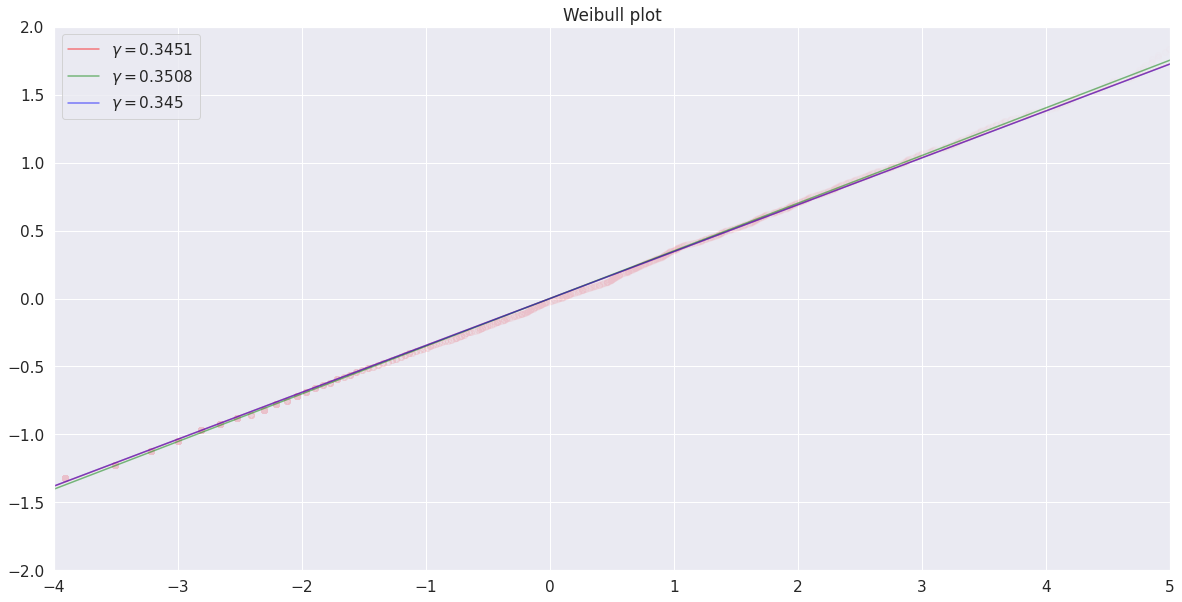

In [14]:
total_emp_cdf = ECDF(sample_2)(sample_2)
# построение графика
x_tmp = np.linspace(-4, 6, 100)
plt.figure(figsize=(20, 10))
plt.scatter(x=np.log(sample_2), y=np.log(-np.log(1 - total_emp_cdf)), alpha=0.01, color='pink')
plt.plot(x_tmp, x_tmp * gamma1, color='red', alpha=0.5, label='$\gamma=${}'.format(round(gamma1, 4)))
plt.plot(x_tmp, x_tmp * gamma2, color='green', alpha=0.5, label='$\gamma=${}'.format(round(gamma2, 4)))
plt.plot(x_tmp, x_tmp * gamma3, color='blue', alpha=0.5, label='$\gamma=${}'.format(round(gamma3, 4)))
plt.xlim(-4, 5)
plt.ylim(-2, 2)
plt.title('Weibull plot')
plt.legend()
plt.show()


**Вывод**
Соответствие линий графику определяется способом обработки нулей. Если заменять на минимальное и уменьшенное от него значение, то мы не наблюдаем вертикальный сдвиг выборки относительно прямой. Если же передавать очень маленькое значение вместо нуля, то по свойству логарифма мы получим слишком высокую крутизну прямой. Все неточности связаны с обработкой нулевых значений датасета.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [15]:
theta = 3
N = 1000

Рассмотрим нормальное распределение:
$$\mu_{mm} = \frac{1}{n}\sum_{i=1}^n X_i$$
$$\sigma_{mm}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \mu_{mm})^2$$
$$\theta = \bar{X^2} - \bar{X}^2$$
Равномерное:
$$\theta = $\bar{X} + \sqrt{3(\bar{X^2} - \bar{X}^2)}$$
Гамма:
$$\theta = $\frac{\bar{X^2} - \bar{X}^2}{\bar{X}}$$

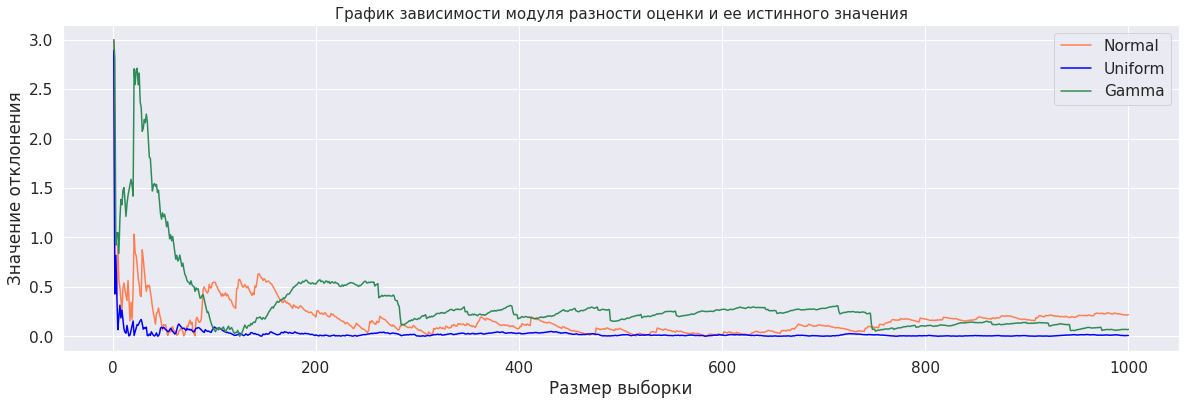

In [16]:
plt.figure(figsize=(20, 6))
# нормальное распределение
sample = sps.norm.rvs(loc=0, scale=np.sqrt(theta), size=N)
consecutive_numbers = np.array(range(1, N + 1, 1))
mu_mm = np.cumsum(sample) / consecutive_numbers
theta_mm = np.cumsum(sample ** 2) / consecutive_numbers - mu_mm ** 2
plt.plot(consecutive_numbers, abs(theta_mm - theta), color='coral', label='Normal')
# равномерное
sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
mu_mm = np.cumsum(sample) / consecutive_numbers
theta_mm = mu_mm + np.sqrt(3 * (np.cumsum(sample ** 2) / consecutive_numbers - mu_mm ** 2))
plt.plot(consecutive_numbers, abs(theta_mm - theta), color='blue', label='Uniform')
# гамма
sample = sps.gamma.rvs(1, scale=theta, size=N)
mu_mm = np.cumsum(sample) / consecutive_numbers
theta_mm = (np.cumsum(sample ** 2) / consecutive_numbers - mu_mm ** 2) / mu_mm
plt.plot(consecutive_numbers, abs(theta_mm - theta), color='seagreen', label='Gamma')

plt.title('График зависимости модуля разности оценки и ее истинного значения', fontsize=15)
plt.xlabel('Размер выборки')
plt.ylabel('Значение отклонения')
plt.legend()
plt.show()

__Вывод__
Заметим, что все оценки, полученные методом моментов при большой выборке сходятся к необходимому значению, сходимость не всегда равномерная.

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



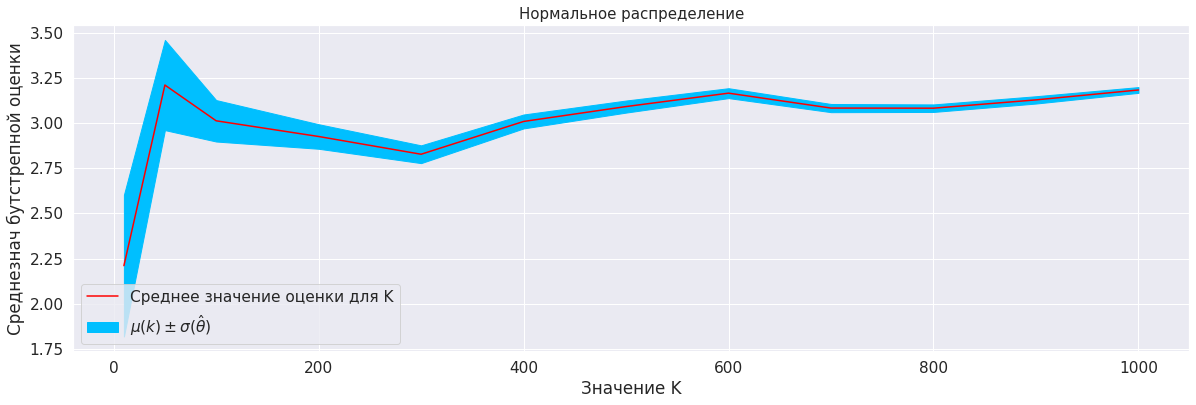

In [17]:
sample = sps.norm.rvs(loc=0, scale=np.sqrt(theta), size=N)
thetas_mean = []
var = []
K_list = [10] + [50] + list(range(100, 1001, 100))
for K in K_list:
    # генерируем k выборок размера k
    new_sample = np.random.choice(sample[:K], size=(K, K))
    # генерируем последовательные числа
    consecutive_numbers = np.array(range(1, K + 1, 1))
    # mu по каждой выборке от 1 до k
    mus = np.array([np.sum(new_sample[i]) / K for i in range(0, K)])
    # для каждой выборки считаем оценку
    thetas = np.array([np.sum(new_sample[i] ** 2) / K - mus[i] ** 2 for i in range(0, K)])
    # для каждого K сохраняем среднее значение
    thetas_mean.append(thetas.mean())
    # сохраняем среднеее значение дисперсии
    var.append(np.var(thetas))

plt.figure(figsize=(20, 6))
plt.plot(K_list, thetas_mean, color='red', label='Среднее значение оценки для K')
plt.fill_between(K_list, thetas_mean + np.array(var), thetas_mean - np.array(var),
                 label='$\mu(k) \pm \sigma(\hat\\theta)$', color='deepskyblue')
plt.title('Нормальное распределение', fontsize=15)
plt.xlabel('Значение K')
plt.ylabel('Среднезнач бутстрепной оценки')
plt.legend()

Равномерное распределение:

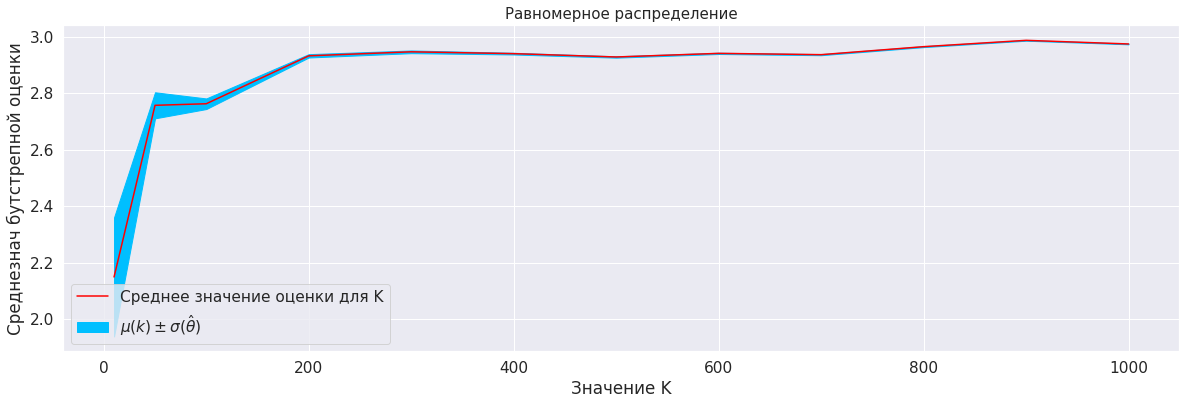

In [18]:
sample = sps.uniform(loc=0, scale=theta).rvs(size=N)
thetas_mean = []
var = []
K_list = [10] + [50] + list(range(100, 1001, 100))
for K in K_list:
    new_sample = np.random.choice(sample[:K], size=(K, K))
    consecutive_numbers = np.array(range(1, K + 1, 1))
    mus = np.array([np.sum(new_sample[i]) / K for i in range(0, K)])
    thetas = np.array([mus[i] + np.sqrt(3 * (np.sum(new_sample[i] ** 2) / K - mus[i] ** 2))
                       for i in range(0, K)])
    thetas_mean.append(thetas.mean())
    var.append(np.var(thetas))

plt.figure(figsize=(20, 6))
plt.plot(K_list, thetas_mean, color='red', label='Среднее значение оценки для K')
plt.fill_between(K_list, thetas_mean + np.array(var), thetas_mean - np.array(var),
                 label='$\mu(k) \pm \sigma(\hat\\theta)$', color='deepskyblue')
plt.title('Равномерное распределение', fontsize=15)
plt.xlabel('Значение K')
plt.ylabel('Среднезнач бутстрепной оценки')
plt.legend()

Гамма распределение:

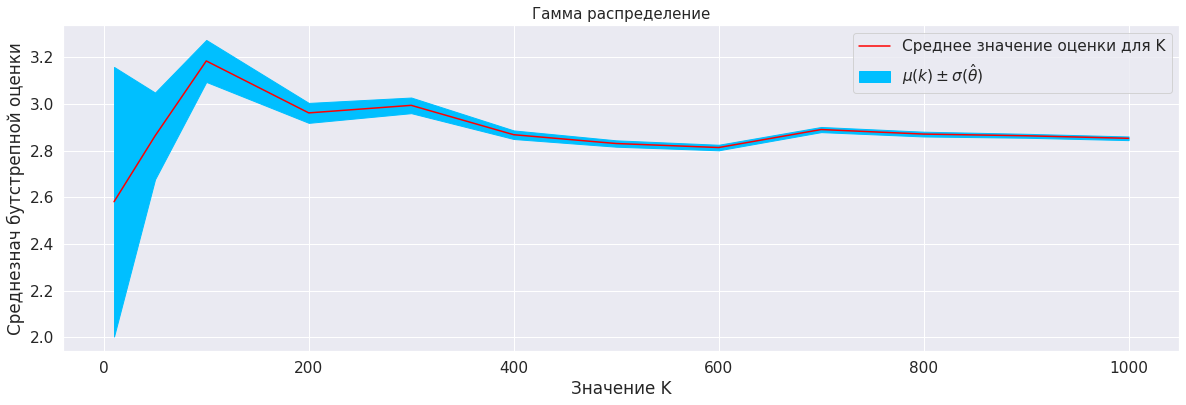

In [19]:
sample = sps.gamma.rvs(1, scale=theta, size=N)
thetas_mean = []
var = []
K_list = [10] + [50] + list(range(100, 1001, 100))
for K in K_list:
    new_sample = np.random.choice(sample[:K], size=(K, K))
    consecutive_numbers = np.array(range(1, K + 1, 1))
    mus = np.array([np.sum(new_sample[i]) / K for i in range(0, K)])
    thetas = np.array([(mus[i] ** 2 - np.sum(sample[i] ** 2) / K) / mus[i] for i in range(0, K)])
    thetas_mean.append(thetas.mean())
    var.append(np.var(thetas))

plt.figure(figsize=(20, 6))
plt.plot(K_list, thetas_mean, color='red', label='Среднее значение оценки для K')
plt.fill_between(K_list, thetas_mean + np.array(var), thetas_mean - np.array(var),
                 label='$\mu(k) \pm \sigma(\hat\\theta)$', color='deepskyblue')
plt.title('Гамма распределение', fontsize=15)
plt.xlabel('Значение K')
plt.ylabel('Среднезнач бутстрепной оценки')
plt.legend()

__Вывод__
Таким образом отметим, что распределения хорошо сходятся к параметру. Равномерное распределение в зависимости от различных генераций сходится наиболее неравномерно в отличие от других.
